In [2]:
#Importación de librerías
try:
  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  import numpy as np
  import pandas as pd
  
except:
  
  import numpy as np
  import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

In [4]:
#Encabezado de los datos
data_pulsar.head()

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [35]:
data_pulsar.describe()

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [32]:
#Conteo de valores positivos y negativos
data_pulsar["is_pulsar"].value_counts()

0    16259
1     1639
Name: is_pulsar, dtype: int64

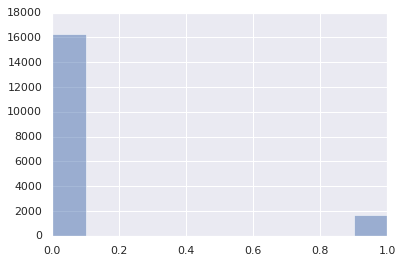

In [15]:
#Histograma de la variable objetivo
plt.hist(data_pulsar["is_pulsar"], alpha=0.5);

# Data Exploration 

En esta sección se realizara dos tipos de analisis al conjunto de datos, primero se realizara un analisis estadistico uni-variable; este consite en la determinación de medidas de tendencia y dispercion de cada variable, asi mismo se realizaran hsitogramas y box-plots de cada una.


> **Medidas de Tendencia:**
> *   Media
> *   Mediana
> *   Moda
> *   Mínimo
> *   Máximo

> **Medidas de Disperción:**
> *   Rango
> *   Cuartil
> *   Rango Inter-Cuartil
> *   Varianza
> *   Desviación estandar
> *   Kurtosis
> *   Asimetría


## Medidas de Tendencia

### Media 

In [44]:
data_pulsar.mean()

mean_IP      111.079968
std_IP        46.549532
kurt_IP        0.477857
skew_IP        1.770279
mean_DM       12.614400
std_DM        26.326515
kurt_DM        8.303556
skew_DM      104.857709
is_pulsar      0.091574
dtype: float64

### Mediana

In [45]:
data_pulsar.median()

mean_IP      115.078125
std_IP        46.947479
kurt_IP        0.223240
skew_IP        0.198710
mean_DM        2.801839
std_DM        18.461316
kurt_DM        8.433515
skew_DM       83.064556
is_pulsar      0.000000
dtype: float64

### Moda

In [57]:
data_pulsar.mode().head()

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
0,106.710938,38.904291,0.001934,-1.791886,1.423913,7.370432,34.539844,1191.000837,0.0
1,NaN,40.466804,NaN,-1.781888,2.050167,NaN,NaN,NaN,NaN
2,NaN,40.515188,NaN,-1.764717,2.294314,NaN,NaN,NaN,NaN
3,NaN,40.750947,NaN,-1.755332,2.332776,NaN,NaN,NaN,NaN
4,NaN,42.312627,NaN,-1.676724,NaN,NaN,NaN,NaN,NaN


In [58]:
data_pulsar.mode().count()

mean_IP          1
std_IP          36
kurt_IP          1
skew_IP      17898
mean_DM          4
std_DM           1
kurt_DM          1
skew_DM          1
is_pulsar        1
dtype: int64

### Mínimo

In [59]:
data_pulsar.min()

mean_IP       5.812500
std_IP       24.772042
kurt_IP      -1.876011
skew_IP      -1.791886
mean_DM       0.213211
std_DM        7.370432
kurt_DM      -3.139270
skew_DM      -1.976976
is_pulsar     0.000000
dtype: float64

### Máximo

In [60]:
data_pulsar.max()

mean_IP       192.617188
std_IP         98.778911
kurt_IP         8.069522
skew_IP        68.101622
mean_DM       223.392140
std_DM        110.642211
kurt_DM        34.539844
skew_DM      1191.000837
is_pulsar       1.000000
dtype: float64

### Box-Plot

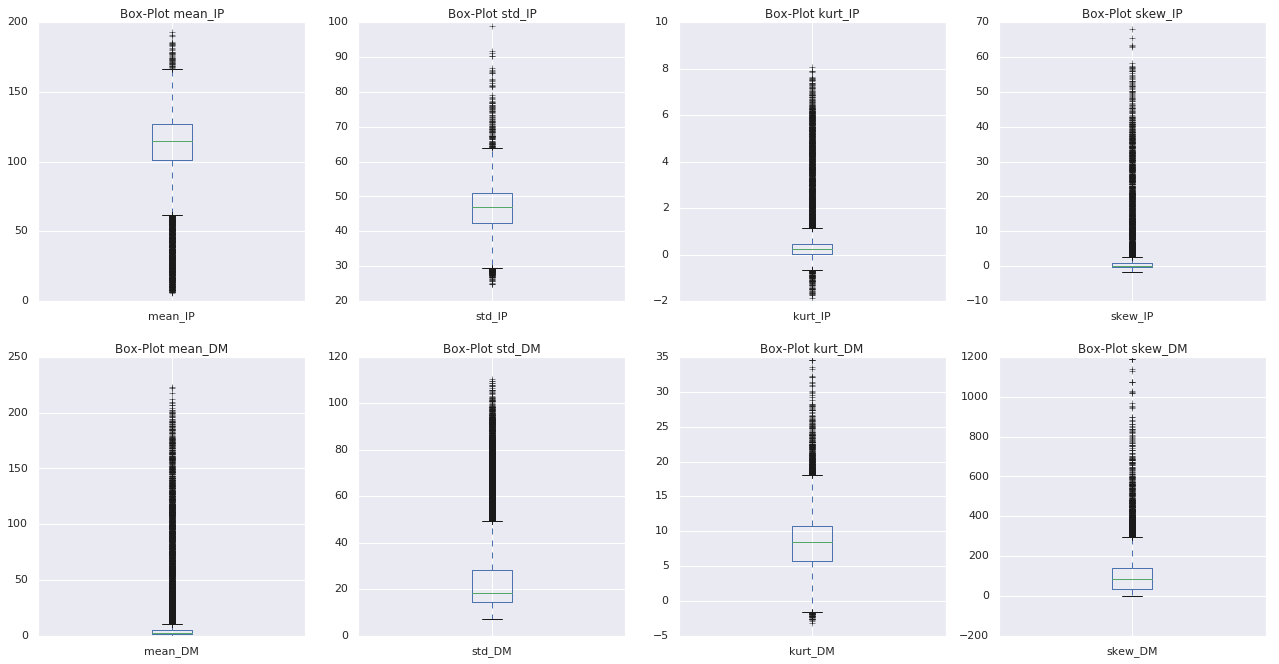

In [86]:
fig=plt.figure(figsize=(22, 11));

plt.subplot(2,4,1)
plt.title("Box-Plot mean_IP")
data_pulsar["mean_IP"].plot.box();

plt.subplot(2,4,2)
plt.title("Box-Plot std_IP")
data_pulsar["std_IP"].plot.box();

plt.subplot(2,4,3)
plt.title("Box-Plot kurt_IP")
data_pulsar["kurt_IP"].plot.box();

plt.subplot(2,4,4)
plt.title("Box-Plot skew_IP")
data_pulsar["skew_IP"].plot.box();

plt.subplot(2,4,5)
plt.title("Box-Plot mean_DM")
data_pulsar["mean_DM"].plot.box();

plt.subplot(2,4,6)
plt.title("Box-Plot std_DM")
data_pulsar["std_DM"].plot.box();

plt.subplot(2,4,7)
plt.title("Box-Plot kurt_DM")
data_pulsar["kurt_DM"].plot.box();

plt.subplot(2,4,8)
plt.title("Box-Plot skew_DM")
data_pulsar["skew_DM"].plot.box();
